# Sondeo eléctrico vertica

In [1]:
import pygimli as pg
import pygimli.meshtools as mt
from  pygimli.physics import VESManager
import numpy as np



# Modelo directo 

Un modelo directo consiste en la generación de datos sintéticos intentando recrear escenarios del subsuelo. 

In [2]:
ab2 = np.logspace(-0.5, 2.5, 40)  # 40 valores AB/2 (electrodos de corriente)

In [4]:
# Definimos un modelo sintético y simular los datos, incluido ruido.

synres = [100., 500., 20., 1000.] # Resistividades de las capas
synthk = [0.5, 3.5, 6.] # espesores de capa

## Operador hacia adelante

In [5]:
synthModel = synthk + synres # modelo sintético, concatena ambas listas

In [6]:
ves =  VESManager()

In [7]:
rhoa, err = ves.simulate(synthModel, ab2=ab2, mn2=ab2/3, noiseLevel = 0.03, seed= 1337) #defino mis  valores simulados 

In [8]:
rhoa


40 [101.38979696368206, 104.19639857251961, 108.02791101022757, 108.00150512901476, 121.74946623744194, 122.62400707040342, 140.39202685891982, 159.47371559631398, 183.6978331294101, 187.23259414009678, 225.57133563252208, 235.8373449523542, 254.3702082982854, 287.52391943014305, 307.91797732069523, 287.4831452315287, 298.8098983538898, 303.5635468425441, 289.57230719728716, 245.3290896293929, 211.81827138709784, 183.35711875301217, 142.120387321365, 117.85230925324441, 104.21234037112188, 92.87971577403238, 95.0138351903641, 95.7586878348878, 118.44305444838852, 139.16518020005807, 169.10809659162922, 182.57468387595685, 226.03973441557795, 242.8423522792249, 290.69835609018486, 326.43756452000315, 373.7706157529075, 429.78935831848133, 464.30599421722127, 521.9892334998898]

In [9]:
err 

array([0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03])

## Inversión de los datos sintéticos

Con esta inversión voy a definir mi modelo por medio de los valores calculados

In [10]:
ves.invert(data = rhoa, error = err, ab2=ab2, mn2=ab2/3, nLayers=4, lam = 1000, lambdaFactor=0.8)

08/02/24 - 23:23:31 - pyGIMLi - WARNING - No data error given, set Fallback set to 1%
08/02/24 - 23:23:31 - pyGIMLi - INFO - Created startmodel from forward operator: 7, min/max=0.052705/185.465214
08/02/24 - 23:23:31 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
08/02/24 - 23:23:31 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
08/02/24 - 23:23:31 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
08/02/24 - 23:23:31 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
08/02/24 - 23:23:31 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
08/02/24 - 23:23:31 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
08/02/24 - 23:23:31 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
08/02/24 - 23:23:32 - pyGIMLi - WARNING - Multiprocess Jacobian cur

7 [0.47997209092978904, 3.382889905411358, 8.560494970462408, 96.60193136536039, 502.8043524430846, 27.990287869735266, 1067.3267427339472]

(<Axes: xlabel='Apparent resistivity ($\\Omega$m)', ylabel='AB/2 (m)'>, None)

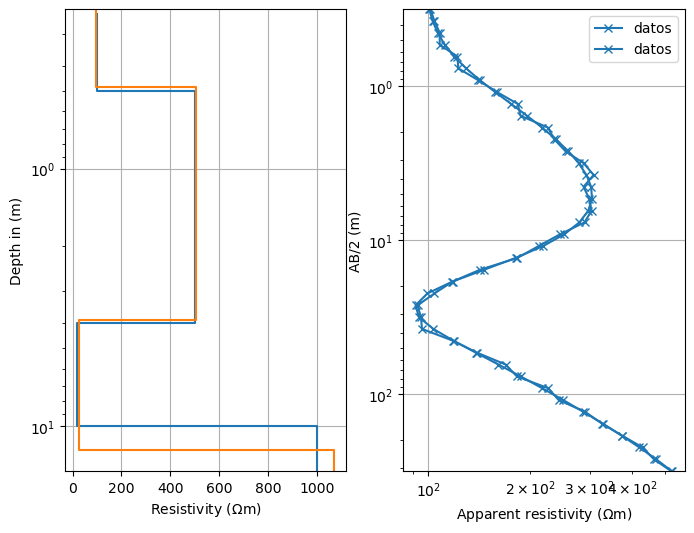

In [14]:
# mostrar modelo estimado y modelo sintético

fig, ax = pg.plt.subplots(ncols=2, figsize=(8,6)) #figura de columnas
ves.showModel(synthModel, ax = ax[0], label = 'Modelo sintético', plot = 'semilogy', zmax = 15) # muestra el modelo sintético
ves.showModel(ves.model, ax = ax[0], label = 'Modelo invertido', plot = 'semilogy', zmax =15) #muestra el modelo invertido
ves.showData(rhoa, ax = ax[1], label = 'datos', color = 'C0', marker = 'x' ) # muestro los datos
ves.showData(ves.inv.response, ax = ax[1], label = 'datos', color = 'C0', marker = 'x' ) # muestro los datos invertidos

## Modelo inverso de datos reales